In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import polars as pl
import os

In [2]:
data_dir = "/home/hxastur/vscode_projects/ieee-cis-fraud-detection/competition_data"
train_identity_path = os.path.join(data_dir, "train_identity.csv")
train_transaction_path = os.path.join(data_dir, "train_transaction.csv")
test_identity_path = os.path.join(data_dir, "test_identity.csv")
test_transaction_path = os.path.join(data_dir, "test_transaction.csv")

In [3]:
train_identity = pd.read_csv(train_identity_path)
train_transaction = pd.read_csv(train_transaction_path)
test_identity = pd.read_csv(test_identity_path)
test_transaction = pd.read_csv(test_transaction_path)

In [4]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [5]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
print(
    f"Shapes\ntrain_identity: {train_identity.shape}\ntrain_transaction: {train_transaction.shape}\ntest_identity: {test_identity.shape}\ntest_transaction: {test_transaction.shape}"
)

Shapes
train_identity: (144233, 41)
train_transaction: (590540, 394)
test_identity: (141907, 41)
test_transaction: (506691, 393)


In [7]:
train_transaction["TransactionID"].is_unique, test_transaction[
    "TransactionID"
].is_unique

(True, True)

In [8]:
(train_transaction["TransactionID"]).isin(
    train_identity["TransactionID"].unique()
).sum(), (test_transaction["TransactionID"]).isin(
    test_identity["TransactionID"].unique()
).sum()

(np.int64(144233), np.int64(141907))

In [9]:
train_df = pd.merge(train_transaction, train_identity, how="left")
test_df = pd.merge(test_transaction, test_identity, how="left")
print(f"Dataset sizes | train: {train_df.shape}, test: {test_df.shape}")

Dataset sizes | train: (590540, 434), test: (506691, 433)



[Data description](https://www.kaggle.com/competitions/ieee-fraud-detection/discussion/101203)

---

**Transaction Table**

TransactionDT: timedelta from a given reference datetime (not an actual timestamp)

TransactionAMT: transaction payment amount in USD

ProductCD: product code, the product for each transaction

card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.

addr: address

dist: distance

P_ and (R__) emaildomain: purchaser and recipient email domain

C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.

D1-D15: timedelta, such as days between previous transaction, etc.

M1-M9: match, such as names on card and address, etc.

Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

Categorical Features: ProductCD card1 - card6 addr1, addr2 P_emaildomain R_emaildomain M1 - M9

---

**Identity Table**

Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions. They're collected by Vesta’s fraud protection system and digital security partners. (The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

Categorical Features: DeviceType DeviceInfo id_12 - id_38

In [10]:
train_transaction["TransactionAmt"].describe()

count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

Text(0, 0.5, 'Frequency')

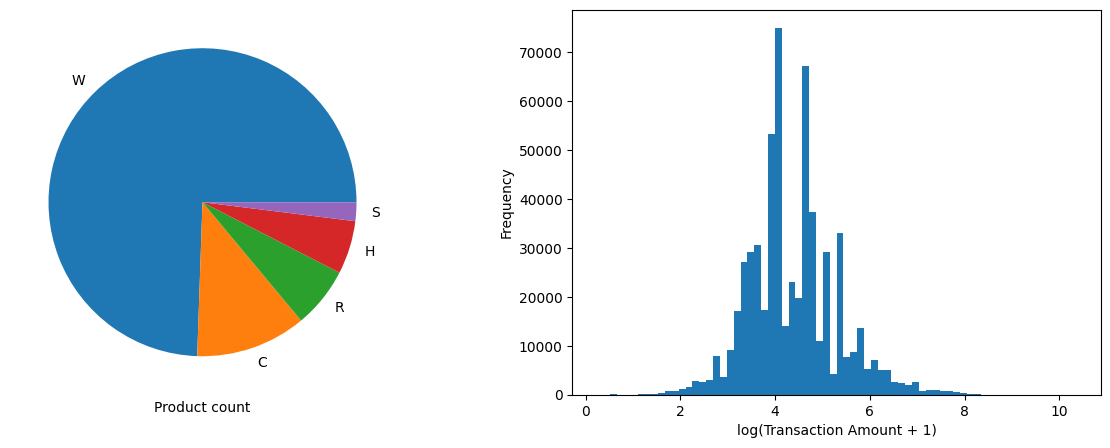

In [11]:
fix, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))

product_count = train_transaction["ProductCD"].value_counts()
axes[0].pie(product_count.values, labels=product_count.index)
axes[0].set_xlabel("Product count")

log_amt = np.log1p(train_transaction["TransactionAmt"])
axes[1].hist(log_amt, bins=70)
axes[1].set_xlabel("log(Transaction Amount + 1)")
axes[1].set_ylabel("Frequency")

In [12]:
train_transaction["TransactionDT"].describe()

count    5.905400e+05
mean     7.372311e+06
std      4.617224e+06
min      8.640000e+04
25%      3.027058e+06
50%      7.306528e+06
75%      1.124662e+07
max      1.581113e+07
Name: TransactionDT, dtype: float64

In [13]:
print(
    f"TransactionDT in days\n\nTRAIN\nMin: {train_transaction['TransactionDT'].min()/(60*60*24)}\nMax: {train_transaction['TransactionDT'].max()/(60*60*24)}"
)
print(
    f"TEST\nMin: {test_transaction['TransactionDT'].min()/(60*60*24)}\nMax: {test_transaction['TransactionDT'].max()/(60*60*24)}"
)
print(
    f"\nGap: {test_transaction['TransactionDT'].min()/(60**2*24) - train_transaction['TransactionDT'].max()/(60**2*24)}"
)

TransactionDT in days

TRAIN
Min: 1.0
Max: 182.99920138888888
TEST
Min: 213.00027777777777
Max: 395.99936342592594

Gap: 30.00107638888889


In [14]:
one_value_cols_train = [col for col in train_df.columns if train_df[col].nunique() <= 1]
one_value_cols_test = [col for col in test_df.columns if test_df[col].nunique() <= 1]

print(
    f"Number of columns in train with one unique value: {len(one_value_cols_train)}\nNumber of columns in test with one unique value: {len(one_value_cols_test)}"
)
print(one_value_cols_train, one_value_cols_test)

Number of columns in train with one unique value: 0
Number of columns in test with one unique value: 1
[] ['V107']


In [15]:
print(f"Percentage of Fraud: {train_transaction['isFraud'].mean():0.2}")

Percentage of Fraud: 0.035


Continuous values

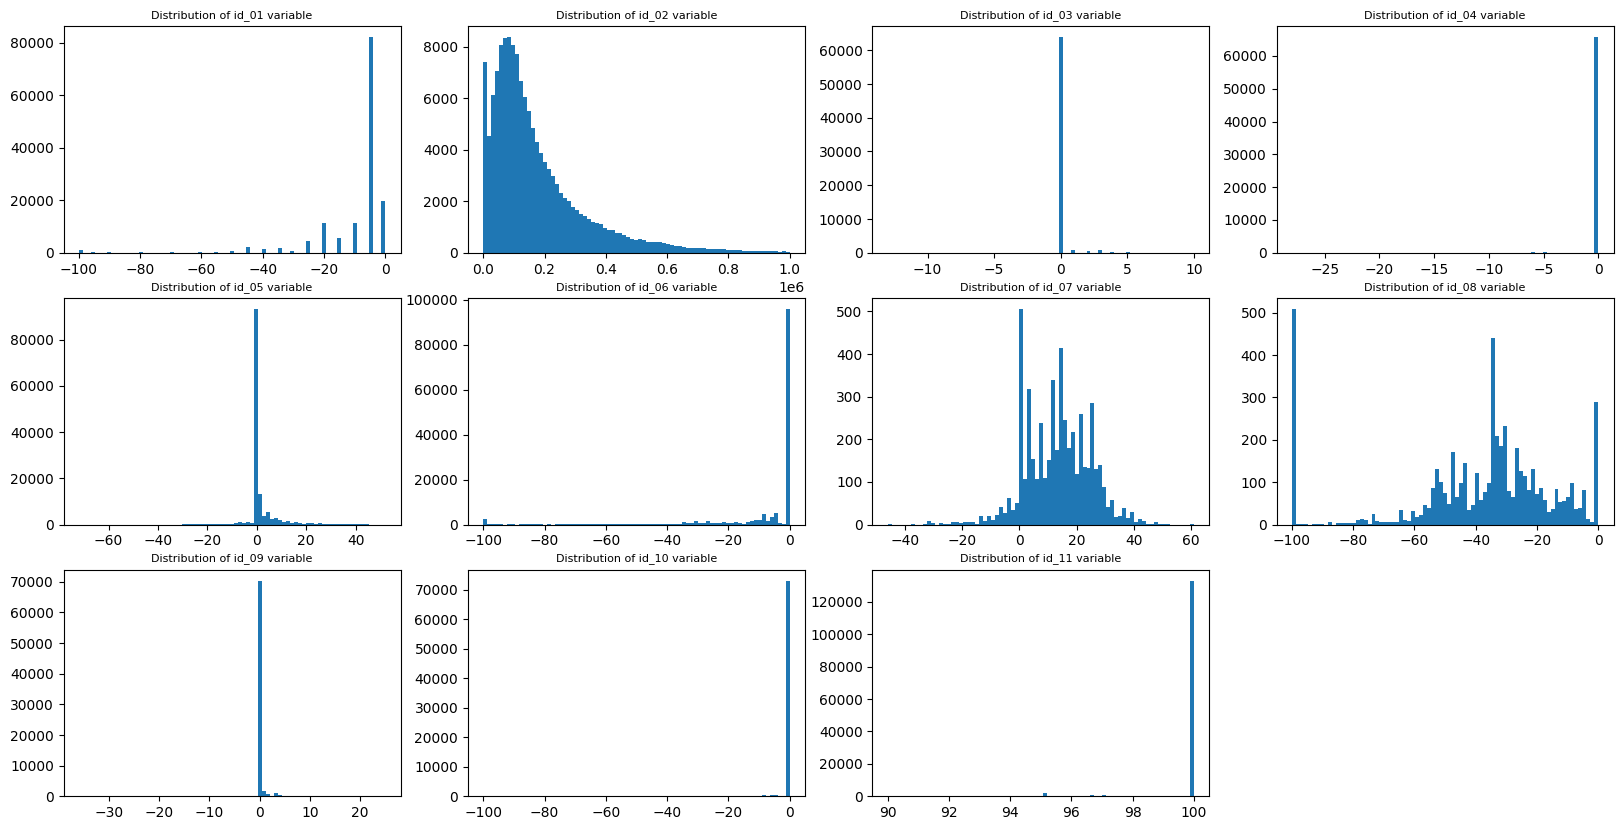

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))
id_names = [f"id_0{i}" if i < 10 else f"id_{i}" for i in range(1, 12)]
idx = 0
for i in range(3):
    for j in range(4):
        if idx >= len(id_names):
            axes[i][j].set_visible(False)
            break
        var_name = id_names[idx]
        axes[i][j].hist(train_df[var_name], bins=77)
        axes[i][j].set_title(f"Distribution of {var_name} variable", fontsize=8)
        idx += 1

In [17]:
train_df["id_03"].value_counts(dropna=False, normalize=True).head()

id_03
NaN    0.887689
0.0    0.108211
1.0    0.001461
3.0    0.001131
2.0    0.000713
Name: proportion, dtype: float64

In [18]:
train_df["id_04"].value_counts(dropna=False, normalize=True).head()

id_04
 NaN    0.887689
 0.0    0.111320
-5.0    0.000224
-6.0    0.000166
-8.0    0.000108
Name: proportion, dtype: float64

In [19]:
train_df["id_11"].value_counts(dropna=False, normalize=True).head(10)

id_11
NaN           0.761273
100.000000    0.225492
95.080002     0.002085
95.160004     0.001277
97.120003     0.000745
96.669998     0.000564
95.650002     0.000484
96.190002     0.000408
94.290001     0.000386
93.550003     0.000345
Name: proportion, dtype: float64

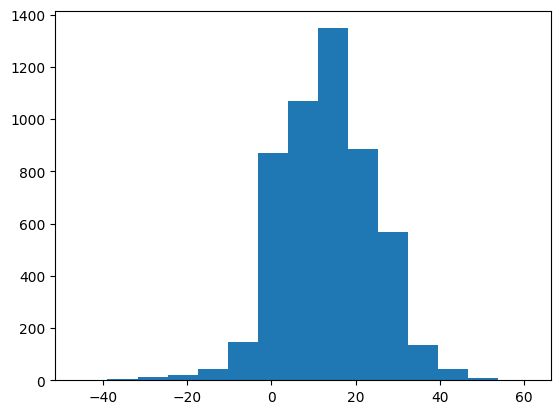

In [20]:
plt.hist(train_df["id_07"], bins=15)
plt.show()

Text(0.5, 1.0, 'Distributeion of trasaction dates')

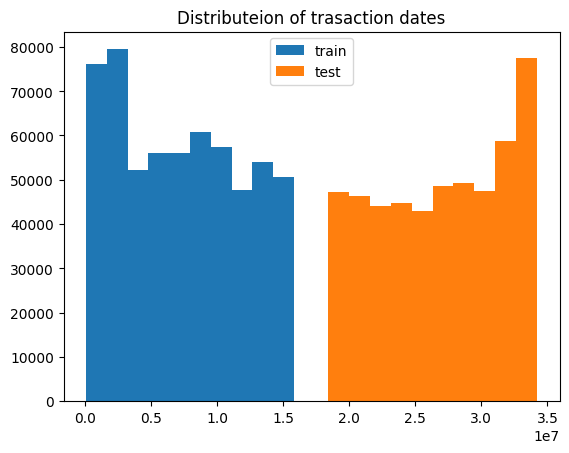

In [21]:
plt.hist(train_df["TransactionDT"], label="train")
plt.hist(test_df["TransactionDT"], label="test")
plt.legend()
plt.title("Distributeion of trasaction dates")

time-based split for validation: https://www.kaggle.com/code/robikscube/ieee-fraud-detection-first-look-and-eda

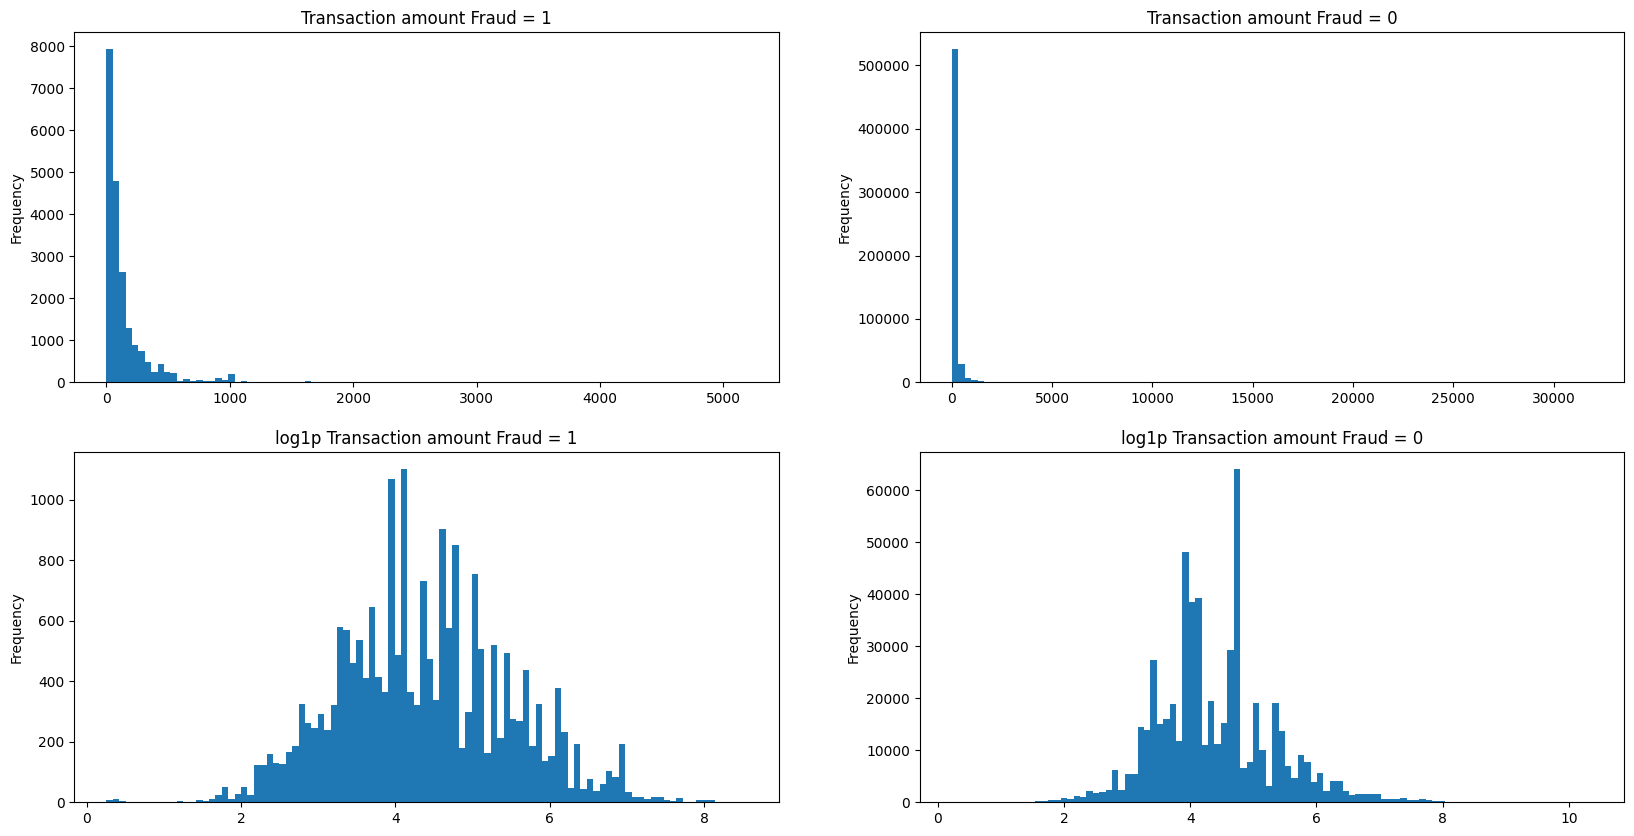

In [26]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))
train_transaction[train_transaction["isFraud"] == 1]["TransactionAmt"].plot(
    kind="hist",
    bins=100,
    ax=ax1,
    title="Transaction amount Fraud = 1",
)
train_transaction[train_transaction["isFraud"] == 0]["TransactionAmt"].plot(
    kind="hist",
    bins=100,
    ax=ax2,
    title="Transaction amount Fraud = 0",
)
train_transaction[train_transaction["isFraud"] == 1]["TransactionAmt"].apply(
    np.log1p
).plot(
    kind="hist",
    bins=100,
    ax=ax3,
    title="log1p Transaction amount Fraud = 1",
)
train_transaction[train_transaction["isFraud"] == 0]["TransactionAmt"].apply(
    np.log1p
).plot(
    kind="hist",
    bins=100,
    ax=ax4,
    title="log1p Transaction amount Fraud = 0",
)
plt.show()